# ML/DL 인증 평가

### 실습 문항 평가 방법

### 각 문항별 10점
1. 각 산출물은 타 산출물의 코드 없이도 단독적으로  정상 수행되도록 코드 작성(오류 없이 수행 시) : **4점**
2. 코드마다 주석 포함 : **2점**(예제코드에 이미 있는 주석은 제외)
3. 정확한 결과 도출 : **4점**

**[주의사항]** **Jupyter Notebook에 실행 결과가 보이도록 출력 결과를 담아서 제출**하시기 바랍니다. 출력 결과가 보이지 않으면 **실행되지 않는 코드로 평가**하겠습니다. 

## Preprocessing

In [35]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
from imutils import paths
import os
import cv2

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
cd gdrive/My\ Drive/DL2

/content/gdrive/My Drive/DL2


<img src="datasets/images/prob01.png" width=450>

**Quiz 1.** 다음 함수는 종횡비를 고려하여 크기를 조절하는 함수입니다. 종횡비의 비율을 구하기 위해서는 원본 이미지와 변환하고자하는 이미지의 width나 height 중 하나가 필요합니다. 다음의 함수에서 누락된 부분을 작성하여 함수를 완성해보세요.

In [36]:
def aspect_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
  h, w = image.shape[:2]
  r = 64.0/w
  dim = (64, int(r*h))

  return cv2.resize(image, dim)


In [37]:
sample_img = plt.imread("./datasets/flowers17/images/daisy/image_0865.jpg")

In [38]:
sample_img.shape

(665, 500, 3)

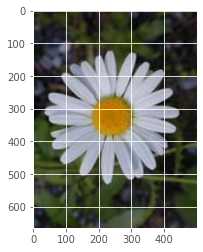

In [39]:
plt.imshow(sample_img)

앞서 작성한 aspect_resize 함수를 사용하면 원본 이미지의 종횡비를 유지한 채, 크기를 조정하는 것을 확인할 수 있습니다.

In [40]:
resize_img = aspect_resize(sample_img,width=64)

In [41]:
resize_img.shape

(85, 64, 3)

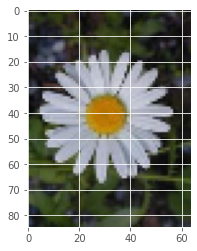

In [42]:
plt.imshow(resize_img)

**[Note]** 다음 문제를 풀기 전에 Quiz 1을 풀지 못하셨다면, 아래의 Raw NBConvert 행을 code 행으로 변환하고 실행시키시면, 함수가 작동되는 것을 확인하실 수 있습니다. **Quiz 1이 동작해야 Quiz 2 문제를 작성하실 수 있습니다. 이점 주의하시기 바랍니다.** (상단 툴바의 dropbox를 통해 Raw NBConvert 행을 code 행으로 바꾸실 수 있습니다.) 

In [43]:
from module.solution import aspect_resize

**Quiz 2.** 다음 함수는 종횡비를 고려하여 크기를 조절하고, 입력으로 주어진 width, height에 맞게 이미지를 자르는 역할을 수행합니다. 이미지를 자를 때는 중심 부분을 유지하고 양단 끝부분을 자릅니다. 

이 역할을 수행하는 함수를 작성하세요.

In [44]:
def aspect_preprocess(image, width, height):
  image = aspect_resize(image)
  return image[(int(image.shape[0]) - height) // 2 : (int(image.shape[0]) + height) // 2,
                 (int(image.shape[1]) - width) // 2 : (int(image.shape[1]) + width) // 2]

함수가 잘 작성되었다면, 다음과 같은 결과를 확인하실 수 있습니다.

In [45]:
resize_img = aspect_preprocess(sample_img, width=64, height=64)

In [46]:
resize_img.shape

(64, 64, 3)

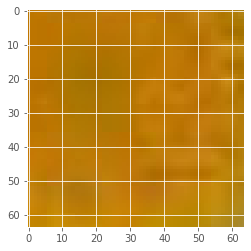

In [47]:
plt.imshow(resize_img)

**[Note]** 다음 문제를 풀기 전에 Quiz 2을 풀지 못하셨다면, 아래의 Raw NBConvert 행을 code 행으로 변환하고 실행시키시면, 함수가 작동되는 것을 확인하실 수 있습니다. **Quiz 2가 동작해야 Quiz 3 문제를 작성하실 수 있습니다. 이점 주의하시기 바랍니다.** (상단 툴바의 dropbox를 통해 Raw NBConvert 행을 code 행으로 바꾸실 수 있습니다.)

from module.solution import aspect_preprocess

## Load Data and Encode Label

In [16]:
data = []
labels = []
imagePaths = list(paths.list_images("./datasets/flowers17/images"))

# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]

    # fixed 64x64 pixels, ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = aspect_preprocess(image, 64, 64)

    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)

**Quiz 3**. 이미지 데이터는 0-255 값의 정수를 지닙니다. 모델 학습을 수행하기 전에 값의 범위를 0~1 사이로 정규화를 수행하세요.

In [17]:
data = data/255


**Quiz 4**. 모델 학습을 수행하기 위해 라벨을 인코딩합니다. 하지만, 인코딩된 결과는 사람이 식별하기 어려운 값입니다. 이후에 모델 성능 평가를 할 때 사람이 식별할 수 있는 라벨 정보가 필요하므로 이를 별도로 저장하는 것이 필요합니다. 고유한 라벨 정보를 저장한 리스트를 작성하세요. (참고로, 리스트에 저장되는 순서는 라벨에서 등장하는 순서이고, 중복은 허용하지 않습니다.)

In [18]:
classNames = list(set(labels))

**[Note]** 다음 문제를 풀기 전에 Quiz 3,4를 풀지 못하셨다면, 아래의 Raw NBConvert 행을 code 행으로 변환하고 실행시키시면, 함수가 작동되는 것을 확인하실 수 있습니다. **Quiz 3,4가 동작해야 Quiz 5 문제를 작성하실 수 있습니다. 이점 주의하시기 바랍니다.** (상단 툴바의 dropbox를 통해 Raw NBConvert 행을 code 행으로 바꾸실 수 있습니다.)

**Quiz 3, 4 Solution은 Quiz 3 문제 이전에 실행한 data, labels 값을 입력으로 전달해야 합니다.**

Quiz 3을 풀지 못했으면 다음 행을 실행하세요.

from module.solution import load_data

data = load_data(data)

Quiz 4를 풀지 못했으면 다음 행을 실행하세요.

from module.solution import encode_label

classNames = encode_label(labels)

다음에 labels을 one-hot encode로 변환합니다.

In [19]:
labels = LabelBinarizer().fit_transform(labels)

## Split Dataset (Train/Validation/Test)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, random_state=42)

**Quiz 5**. 모델을 훈련할 때, 학습된 모델의 일반화 특성을 살펴보기 위해 Validation data를 사용합니다. 여기서는 Validation data를 Train data의 15%를 사용하겠습니다. 다음의 코드를 작성하여 Validataion data를 생성하세요. (변수명은 valX, valY를 사용합니다.)

In [22]:
(trainX, valX, trainY, valY) = (trainX[:816], trainX[816:], trainY[:816], trainY[816:])

**[Note]** 다음 문제를 풀기 전에 Quiz 5를 풀지 못하셨다면, 아래의 Raw NBConvert 행을 code 행으로 변환하고 실행시키시면, 함수가 작동되는 것을 확인하실 수 있습니다. **Quiz 5가 동작해야 Quiz 6 문제를 작성하실 수 있습니다. 이점 주의하시기 바랍니다.** (상단 툴바의 dropbox를 통해 Raw NBConvert 행을 code 행으로 바꾸실 수 있습니다.)

from module.solution import split_valid

(trainX, valX, trainY, valY) = split_valid(data, labels)

## Design Model

**Quiz 6**. 이미지 데이터 분류를 위한 CNN(Convolutional Neural Network)를 작성해보겠습니다. 여기에서는 VGG model의 아이디어를 기반으로 MiniVGG 모델을 작성합니다. VGG 모델은 2가지 특징이 있습니다. 
* Convolution filter는 3x3 만 사용
* Pooling Layer 적용하기전에 한번 이상의 Convolution Layer를 사용

이를 고려하여 클래스에 기재된 주석대로 모델을 구현해보세요. (참고로, Dropout 비율은, Conv Layer에서는 25%, Dense Layer에서는 50%를 사용합니다.)

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [24]:
# 각 주석에 코드를 작성하세요.

# CONV = Convolution layer
# DO = Dropout layer
# FC = Fully Connected layer

class MiniVGGNet:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        
        # first CONV => RELU => CONV => RELU => POOL => DO layer set
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # second CONV => RELU => CONV => RELU => POOL => DO layer set
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))


        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

**[Note]** 다음 문제를 풀기 전에 Quiz 6를 풀지 못하셨다면, 아래의 Raw NBConvert 행을 code 행으로 변환하고 실행시키시면, 함수가 작동되는 것을 확인하실 수 있습니다. **Quiz 6이 동작해야 Quiz 7 문제를 작성하실 수 있습니다. 이점 주의하시기 바랍니다.** (상단 툴바의 dropbox를 통해 Raw NBConvert 행을 code 행으로 바꾸실 수 있습니다.)

from module.solution import MiniVGGNet

Compiling model

In [25]:
from tensorflow.keras.optimizers import SGD

In [26]:
opt = SGD(lr=0.01)
model = MiniVGGNet.build(width=64, height=64, depth=3,
                                            classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt,
                            metrics=["accuracy"])

Training network

In [27]:
H = model.fit(trainX, trainY, validation_data=(valX, valY),
                        batch_size=32, epochs=100, verbose=1)

Epoch 1/100
26/26 [==============================] - 1s 23ms/step - loss: 3.5570 - accuracy: 0.1618 - val_loss: 2.8267 - val_accuracy: 0.0515
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 2.8132 - accuracy: 0.2635 - val_loss: 2.9316 - val_accuracy: 0.0551
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 2.3759 - accuracy: 0.3297 - val_loss: 3.0693 - val_accuracy: 0.0772
Epoch 4/100
26/26 [==============================] - 0s 11ms/step - loss: 2.2357 - accuracy: 0.3652 - val_loss: 3.1546 - val_accuracy: 0.0846
Epoch 5/100
26/26 [==============================] - 0s 11ms/step - loss: 1.9135 - accuracy: 0.4301 - val_loss: 3.0766 - val_accuracy: 0.0919
Epoch 6/100
26/26 [==============================] - 0s 11ms/step - loss: 1.8029 - accuracy: 0.4534 - val_loss: 3.1853 - val_accuracy: 0.0993
Epoch 7/100
26/26 [==============================] - 0s 11ms/step - loss: 1.7119 - accuracy: 0.4743 - val_loss: 3.1691 - val_accuracy: 0.0809
Epoch 

Evaluating network

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
                predictions.argmax(axis=1), target_names=classNames))

              precision    recall  f1-score   support

      crocus       0.25      0.44      0.32         9
     cowslip       0.40      0.47      0.43        17
   buttercup       0.44      0.27      0.33        15
   coltsfoot       0.22      0.25      0.24        16
    snowdrop       0.22      0.12      0.15        17
   sunflower       0.35      0.30      0.32        20
    bluebell       0.33      0.38      0.35        16
       daisy       0.42      0.62      0.50        13
   dandelion       0.50      0.57      0.53        14
       pansy       0.43      0.43      0.43        23
        iris       0.60      0.38      0.46        16
    daffodil       0.36      0.27      0.31        15
   tigerlily       0.25      0.55      0.34        11
  lilyvalley       0.38      0.86      0.52        14
  windflower       0.62      0.26      0.37        19
       tulip       0.20      0.06      0.09        17
  fritillary       0.65      0.55      0.59        20

    accuracy              

Plot the training loss and accuracy

KeyError: ignored

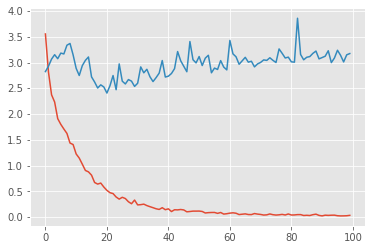

In [30]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## Data augmentation

Compiling model

In [ ]:
opt = SGD(lr=0.01)
model = MiniVGGNet.build(width=64, height=64, depth=3,
                                    classes=len(classNames))
model.compile(loss="categorical_crossentropy", optimizer=opt,
                                    metrics=["accuracy"])

**Quiz 7.** Data augmentation을 사용하면 오버피팅을 방지하고, 일반화 성능을 향상시킬 수 있습니다. Keras에서 data augmentation을 위한 ImageDataGenerator 함수를 제공하고 있습니다. 이를 사용해서 모델을 학습해보겠습니다. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug = ImageDataGenerator( 
                                                # 여기에 코드를 작성하세요. 
                                            )

In [ ]:
H = model.fit_generator( 
                                            # 여기에 코드를 작성하세요. 
                                    )

Evaluating network

In [ ]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
         predictions.argmax(axis=1), target_names=classNames))

Plot the training loss and accuracy

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()